In [133]:
import pandas as pd
import numpy as np
import datetime as dt

import squarify
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# RFM Analysis #

### RFM:
- **Recency**: How recent a customer made a purchase.
- **Frequency**: How often a customer makes a purchase.
- **Monetary**: How much a customer spends on purchases.

### Goal:
- Identify customer segments
- Understand behavioral trends in each segment
- Develop targeted strategies to enhance customer engagement and revenue contribution

# Business Understanding

### Retail Store: Kostko ###
Kostko is a wholesale retail company that operates both online and offline, catering to a diverse market segment that includes individual consumers, businesses, and retail stores. 

Known for its wide-ranging selection of products, Kostko provides everything from everyday necessities to specialized items, making it a one-stop shop for all customer needs.

### Problem Statement ###


Business Need:
+ The business aims to segment its customers based on purchasing behavior to:
+ Identify high-value customers
+ Re-engage inactive customers
+ Nurture new or potential loyal customers

The goal of this analysis is to:

Conduct an analysis using the RFM framework (Recency, Frequency, and Monetary value) to:

+ Identify customer segments
+ Understand behavioral trends in each segment
+ Develop targeted strategies to enhance customer engagement and revenue contribution


Objectives:

Segment customers into actionable groups (e.g., Champions, Loyal Customers, At-Risk, Lost).
Prioritize resources and marketing campaigns based on the value and behavior of each segment.
Improve retention rates, increase repeat purchases, and boost overall customer lifetime value (CLV).

## 1. Data Understanding

In [13]:
df = pd.read_csv('customer_segmentation_100k.csv')
df

,customer_id,qtt_order,total_spent,last_order
0,0,41,321785.93,2022-08-04 01:00:00
1,1,126,185018.15,2022-09-17 11:00:00
2,2,3,357434.58,2022-04-01 14:00:00
3,3,74,2828.39,2022-02-15 18:00:00
4,4,243,76092.70,2022-01-27 04:00:00
...,...,...,...,...
99995,99995,34,126660.57,2022-05-02 10:00:00
99996,99996,121,146961.67,2022-08-26 16:00:00
99997,99997,772,1209294.82,2022-06-18 08:00:00
99998,99998,7,70117.32,2022-09-22 06:00:00


In [15]:
rows, columns = df.shape

print(f"Panjang baris: {rows}")
print(f"Panjang kolom: {columns}")


Panjang baris: 100000
Panjang kolom: 4


### Columns:
- `customer_id`: Unique identifier for each customer.
- `qtt_order`: The total quantity of products ordered by the customer.
- `total_spent`: The total amount spent by the customer.
- `last_order`: The date of the customer's most recent order.

In [18]:
# Types of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  100000 non-null  int64  
 1   qtt_order    100000 non-null  int64  
 2   total_spent  100000 non-null  float64
 3   last_order   100000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


In [20]:
df.describe()

,customer_id,qtt_order,total_spent
count,100000.000000,100000.000000,1.000000e+05
mean,49999.500000,103.562210,2.312485e+05
std,28867.657797,134.773894,2.593265e+05
min,0.000000,0.000000,5.616000e+02
25%,24999.750000,25.000000,6.471141e+04
50%,49999.500000,56.000000,1.401359e+05
75%,74999.250000,121.000000,2.960227e+05
max,99999.000000,1370.000000,2.487489e+06


## 2. Data Preparation

In [23]:
# Turn columns consisting date to datetime types

df['last_order'] = pd.to_datetime(df['last_order'])

In [25]:
# Handle missing values

print(df.isnull().sum())

customer_id    0
qtt_order      0
total_spent    0
last_order     0
dtype: int64


In [27]:
# Check duplicated rows

print(df.duplicated().sum())

0


In [29]:
# Check the range of dates to see if it is reasonable

print(df['last_order'].min(), df['last_order'].max())

2021-12-03 13:00:00 2023-01-19 16:00:00


In [31]:
# Check the range of total spent to see if it is reasonable
print(f"min: {df['total_spent'].min()}, max: {df['total_spent'].max()}")


561.6 2487489.3


In [33]:
# Check the range of quantity order to see if it is reasonable
print(f"min: {df['qtt_order'].min()}, max: {df['qtt_order'].max()}")

0 1370


In [35]:
df[df['qtt_order'] == 0]

,customer_id,qtt_order,total_spent,last_order
240,240,0,228035.13,2022-07-18 05:00:00
2074,2074,0,31141.65,2022-03-24 22:00:00
2141,2141,0,20102.95,2022-12-07 17:00:00
3238,3238,0,99187.76,2022-03-14 10:00:00
3384,3384,0,94036.06,2022-03-21 09:00:00
...,...,...,...,...
96645,96645,0,61941.73,2022-09-06 10:00:00
96891,96891,0,187856.16,2022-06-30 04:00:00
97676,97676,0,990.36,2022-03-16 03:00:00
99628,99628,0,54037.33,2022-03-24 01:00:00


In [37]:
# Filter rows where Quantity does not equal 0
df = df[df['qtt_order'] != 0]
df

,customer_id,qtt_order,total_spent,last_order
0,0,41,321785.93,2022-08-04 01:00:00
1,1,126,185018.15,2022-09-17 11:00:00
2,2,3,357434.58,2022-04-01 14:00:00
3,3,74,2828.39,2022-02-15 18:00:00
4,4,243,76092.70,2022-01-27 04:00:00
...,...,...,...,...
99995,99995,34,126660.57,2022-05-02 10:00:00
99996,99996,121,146961.67,2022-08-26 16:00:00
99997,99997,772,1209294.82,2022-06-18 08:00:00
99998,99998,7,70117.32,2022-09-22 06:00:00


## Explanatory Data Analysis ##

In [135]:

# Assuming your DataFrame is named 'df' and contains 100k rows.
# df = pd.read_csv('your_data.csv')  # Load the data if it's from a CSV file

# Create scatter plot using seaborn
sns.set(style="whitegrid")  # Optional: Set style for the plot
scatter_plot = sns.scatterplot(x=df['qtt_order'], y=df['total_spent'], color='blue')

# Add mean lines directly with seaborn
scatter_plot.axvline(x=df['qtt_order'].mean(), color='red', linestyle='-', label='Mean qtt_order')
scatter_plot.axhline(y=df['total_spent'].mean(), color='green', linestyle='-', label='Mean total_spent')

# Add title and labels
scatter_plot.set_title('Scatter Plot of Quantity Ordered vs Total Spent with Mean Lines', fontsize=14)
scatter_plot.set_xlabel('Quantity Ordered', fontsize=12)
scatter_plot.set_ylabel('Total Spent (in K USD)', fontsize=12)

# Format y-axis to display currency in thousands (K)
scatter_plot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:,.0f}K'))

# Format x-axis to display in a readable format
scatter_plot.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Show legend
scatter_plot.legend()

# Show the plot
plt.show()

KeyError: 'qtt_order'

In [41]:
# Create a new column for average spending per purchase
df_baru = df.copy()
df_baru['avg_spent_per_order'] = df_baru['total_spent'] / df_baru['qtt_order']

# Display the updated dataframe
df_baru

,customer_id,qtt_order,total_spent,last_order,avg_spent_per_order
0,0,41,321785.93,2022-08-04 01:00:00,7848.437317
1,1,126,185018.15,2022-09-17 11:00:00,1468.398016
2,2,3,357434.58,2022-04-01 14:00:00,119144.860000
3,3,74,2828.39,2022-02-15 18:00:00,38.221486
4,4,243,76092.70,2022-01-27 04:00:00,313.138683
...,...,...,...,...,...
99995,99995,34,126660.57,2022-05-02 10:00:00,3725.310882
99996,99996,121,146961.67,2022-08-26 16:00:00,1214.559256
99997,99997,772,1209294.82,2022-06-18 08:00:00,1566.444067
99998,99998,7,70117.32,2022-09-22 06:00:00,10016.760000


In [42]:
df_baru['avg_spent_per_order'].describe()

count     99895.000000
mean       6534.593715
std       16446.764731
min           3.945779
25%         944.080101
50%        2449.136444
75%        6209.374258
max      695933.250000
Name: avg_spent_per_order, dtype: float64

<Axes: xlabel='avg_spent_per_order', ylabel='Count'>

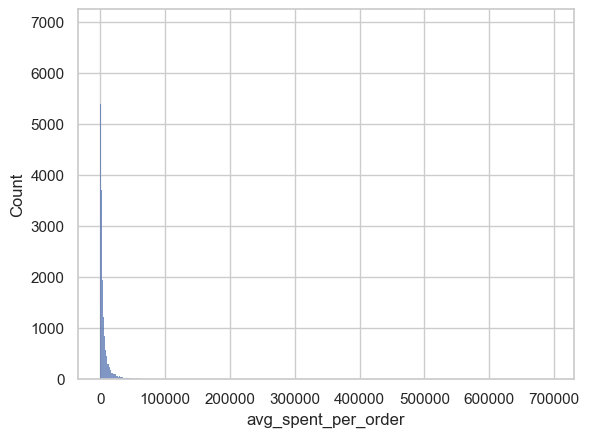

In [43]:
sns.histplot(data=df_baru['avg_spent_per_order'])

<Axes: xlabel='qtt_order', ylabel='Count'>

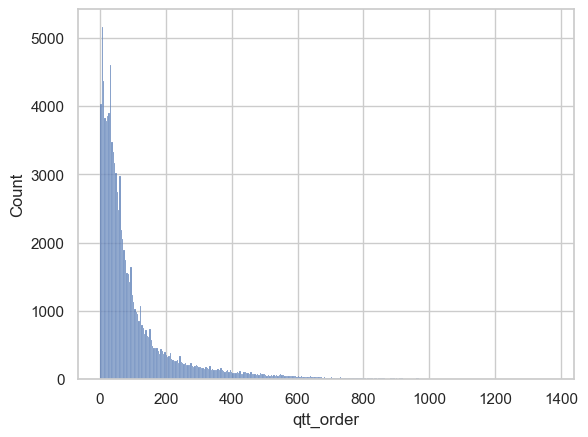

In [44]:
sns.histplot(data=df_baru['qtt_order'])

<Axes: xlabel='total_spent', ylabel='Count'>

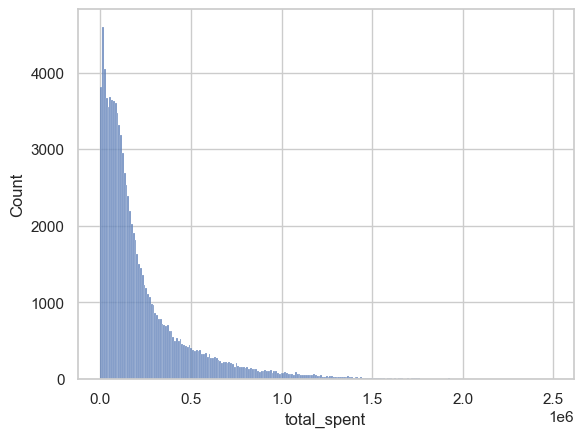

In [45]:
sns.histplot(data=df_baru['total_spent'])

In [ ]:
df_baru['avg_spent_per_order'].describe()

## 3. Calculate RFM Metrics

In [62]:
# Reference date
reference_date = df['last_order'].max() + dt.timedelta(days=1)

In [137]:
rfm_df = df
# Calculate Recency as the number of days between the reference date and the last purchase date
rfm_df['Recency'] = (reference_date - rfm_df['last_order']).dt.days
rfm_df['Frequency']=df['qtt_order']
rfm_df['Monetary']=df['total_spent']

# Reorder columns to have Recency in the correct place
rfm_df = rfm_df[['customer_id', 'Recency', 'Frequency', 'Monetary']]

rfm_df.head()

KeyError: 'last_order'

## 4. RFM Scoring

Once we have the RFM metrics, we assign a score between 1 and 5 for each metric. The scores are based on quintiles:
- **Recency**: Lower recency (more recent purchase) gets a higher score.
- **Frequency**: Higher frequency (more purchases) gets a higher score.
- **Monetary**: Higher monetary value (more money spent) gets a higher score.

These scores are then combined to create an RFM score for each customer.

In [68]:
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [70]:
rfm_df

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,0,169,41,321785.93,4,2,4
1,1,125,126,185018.15,5,4,4
2,2,294,3,357434.58,2,1,4
3,3,338,74,2828.39,1,3,1
4,4,358,243,76092.70,1,5,2
...,...,...,...,...,...,...,...
99995,99995,263,34,126660.57,2,2,3
99996,99996,147,121,146961.67,4,4,3
99997,99997,216,772,1209294.82,3,5,5
99998,99998,120,7,70117.32,5,1,2


## 4. Combine RFM Scores

The next step involves combining the Recency, Frequency, and Monetary scores into a single RFM score. This score is generated by concatenating the Recency, Frequency, and Monetary scores for each customer. The resulting RFM score gives a comprehensive view of a customer’s behavior in terms of their engagement and value.

In [73]:
rfm_df['RFM_Score'] = rfm_df.R_Score.astype(str) + rfm_df.F_Score.astype(str) + rfm_df.M_Score.astype(str)

rfm_df

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,0,169,41,321785.93,4,2,4,424
1,1,125,126,185018.15,5,4,4,544
2,2,294,3,357434.58,2,1,4,214
3,3,338,74,2828.39,1,3,1,131
4,4,358,243,76092.70,1,5,2,152
...,...,...,...,...,...,...,...,...
99995,99995,263,34,126660.57,2,2,3,223
99996,99996,147,121,146961.67,4,4,3,443
99997,99997,216,772,1209294.82,3,5,5,355
99998,99998,120,7,70117.32,5,1,2,512


## 5. RFM Segmentation

In this step, we use combined RFM scores to segment customers into various groups. Each segment represents different customer behaviors based on recency, frequency, and monetary value.

Here are the common segments used in RFM analysis:

- **Hibernating**: Customers who have not made a purchase in a long time, with low frequency and monetary value.
- **At Risk**:  Previously active customers who have not made a purchase for a while, indicating potential churn or loss.
- **Cannot Lose Them**: Customers with high monetary value but low purchase frequency and who have not made a purchase for a long time, requiring special attention to prevent loss.
- **About to Sleep**: Customers with moderate recency and frequency who might stop transacting if not reactivated.
- **Need Attention**: Customers with good potential who need more attention and engagement to boost their activity.
- **Promising**: New customers who have the potential to become loyal or high-value customers.
- **Champion**: Top customers who purchase frequently, have made a recent purchase, and have high spending.
- **Loyal Customer**: Loyal customers who purchase frequently and have high monetary value.
- **Potential Loyalist**: Customers who are almost loyal but not fully, possibly with high frequency but still medium monetary value.
- **New Customers**: Customers who have just made a purchase and may still be exploring the product or brand.
- **Lost**: Customers who have not purchased in a long time, with low frequency and monetary value, and are likely to be lost or churn.

In [91]:
# Create customer segments based on RFM score
Champion = [555, 554, 544, 545, 454, 455, 445]
Loyal_Customer = [543, 444, 435, 355, 354, 345, 344, 335]
Potential_Loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]
New_Customer = [512, 511, 422, 421, 412, 411, 311]
Promising = [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]
Need_Attention = [535, 534, 443, 434, 343, 334, 325, 324]
Cannot_Lose_Them = [155, 154, 144, 214,215,115, 114, 113]
About_to_Sleep = [331, 321, 312, 221, 213]
At_Risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
Hibernating = [332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]
Lost = [111, 112, 121, 131, 141, 151]

# Create a function to assign customers to various customer segments based on RFM score
def assign_cust_seg(col):
    list_col = list(col)
    segment = list()
    for score in list_col:
        if score in Champion:
            value = 'Champion'
        elif score in Loyal_Customer:
            value = 'Loyal Customer'
        elif score in Potential_Loyalist:
            value = 'Potential Loyalist'
        elif score in New_Customer:
            value = 'New Customer'
        elif score in Promising:
            value = 'Promising'
        elif score in Need_Attention:
            value = 'Need Attention'
        elif score in Cannot_Lose_Them:
            value = 'Cannot Lose Them'
        elif score in About_to_Sleep:
            value = 'About to Sleep'
        elif score in At_Risk:
            value = 'At Risk'
        elif score in Hibernating:
            value = 'Hibernating'
        elif score in Lost:
            value = 'Lost'
        else:
            value = 'null'
        segment.append(value)
    return segment

# Assign customers to segments based on their RFM score
rfm_df['Customer Segment'] = assign_cust_seg(rfm_df['RFM_Score'].astype(int))
rfm_df

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer Segment
0,0,169,41,321785.93,4,2,4,424,Promising
1,1,125,126,185018.15,5,4,4,544,Champion
2,2,294,3,357434.58,2,1,4,214,Cannot Lose Them
3,3,338,74,2828.39,1,3,1,131,Lost
4,4,358,243,76092.70,1,5,2,152,At Risk
...,...,...,...,...,...,...,...,...,...
99995,99995,263,34,126660.57,2,2,3,223,Hibernating
99996,99996,147,121,146961.67,4,4,3,443,Need Attention
99997,99997,216,772,1209294.82,3,5,5,355,Loyal Customer
99998,99998,120,7,70117.32,5,1,2,512,New Customer


In [93]:
pd.DataFrame(rfm_df['Customer Segment'].value_counts())

,count
Customer Segment,
Potential Loyalist,16164
At Risk,15970
Hibernating,12278
Promising,9848
Champion,8729
Loyal Customer,7824
New Customer,6774
Need Attention,6447
Lost,6269


## 6. Analyze the Segments

Once customers are segmented, we analyze each segment to understand their behavior:
- **Recency**: How recently customers in each segment have purchased.
- **Frequency**: How often customers in each segment make purchases.
- **Monetary**: How much customers in each segment spend.

This analysis provides insights into which customer groups need more attention and which are high-value, helping businesses tailor their marketing strategies.

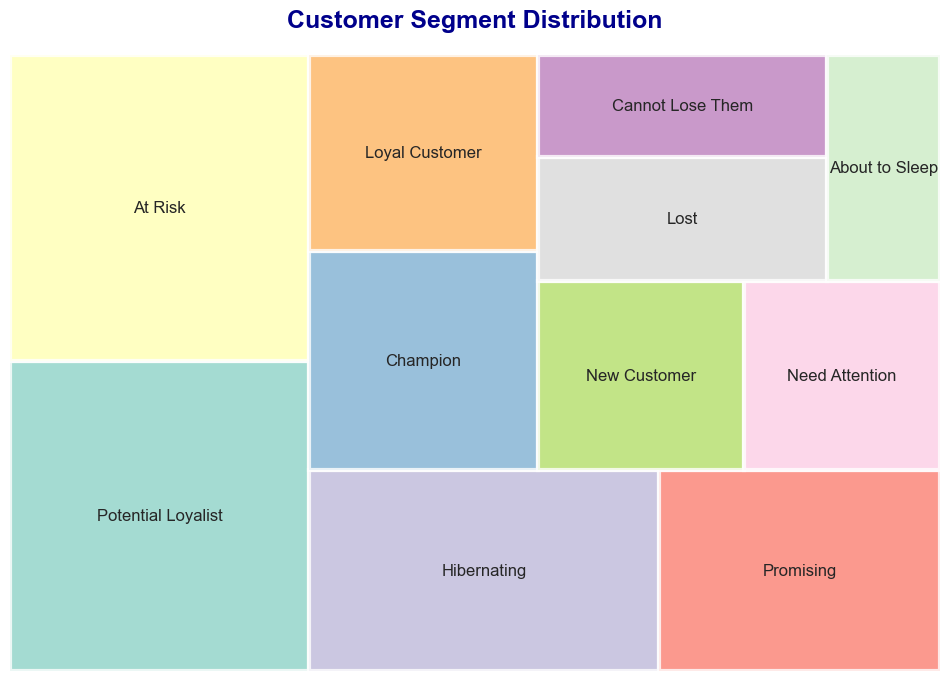

In [96]:
segment_counts = rfm_df['Customer Segment'].value_counts().reset_index()
segment_counts.columns = ['Customer Segment', 'count']

colors = sns.color_palette('Set3', len(segment_counts))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=segment_counts['count'],
    label=segment_counts['Customer Segment'],
    color=colors,
    alpha=0.8,
    edgecolor='white',
    linewidth=3
)

plt.axis('off')

plt.title(
    'Customer Segment Distribution',
    fontsize=18,
    fontweight='bold',
    color='darkblue',
    pad=20
)

# Display the plot
plt.show()

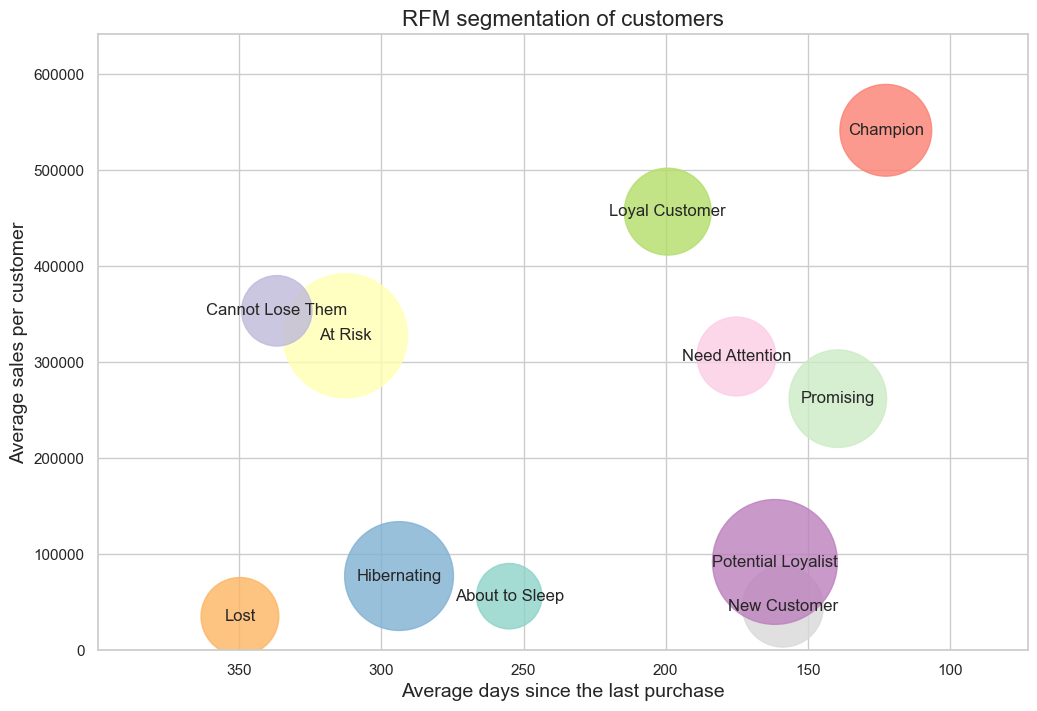

In [106]:
df = rfm_df

segment_summary = df.groupby('Customer Segment').agg(
    avg_days_since_purchase=('Recency', 'mean'),
    avg_sales_per_customer=('Monetary', 'mean'),
    customer_count=('customer_id', 'count')
).reset_index()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    segment_summary['avg_days_since_purchase'],
    segment_summary['avg_sales_per_customer'],
    s=segment_summary['customer_count'] * 0.5,
    c=sns.color_palette('Set3', len(segment_summary)),
    alpha=0.8
)

# Labeling the axes and title
plt.xlabel('Average days since the last purchase', fontsize=14)
plt.ylabel('Average sales per customer', fontsize=14)
plt.title('RFM segmentation of customers', fontsize=16)
plt.grid(True)

for i, text in enumerate(segment_summary['Customer Segment']):
    plt.annotate(
        text,
        (segment_summary['avg_days_since_purchase'][i], segment_summary['avg_sales_per_customer'][i]),
        ha='center',
        va='center'
    )

plt.gca().invert_xaxis()

plt.xlim(segment_summary['avg_days_since_purchase'].max() + 50, segment_summary['avg_days_since_purchase'].min() - 50)
plt.ylim(0, segment_summary['avg_sales_per_customer'].max() + 100000)

plt.show()


In [108]:
rfm_df.to_csv('rfm_baru.csv', index=False)

In [110]:
segment_summary

,Customer Segment,avg_days_since_purchase,avg_sales_per_customer,customer_count
0,About to Sleep,255.029941,56296.185448,4442
1,At Risk,312.745147,327481.959474,15970
2,Cannot Lose Them,336.839029,353467.378992,5150
3,Champion,122.491007,541476.563369,8729
4,Hibernating,293.810474,77283.279482,12278
5,Lost,349.807465,35222.256786,6269
6,Loyal Customer,199.240925,456777.987425,7824
7,Need Attention,175.084535,305920.730613,6447
8,New Customer,158.711249,45406.578403,6774
9,Potential Loyalist,161.508166,91966.498965,16164


In [112]:
segment_summary.to_csv('segmentsummary_baru.csv', index=False)

In [114]:
rfm_df.to_csv('rfm_df.csv', index= False)

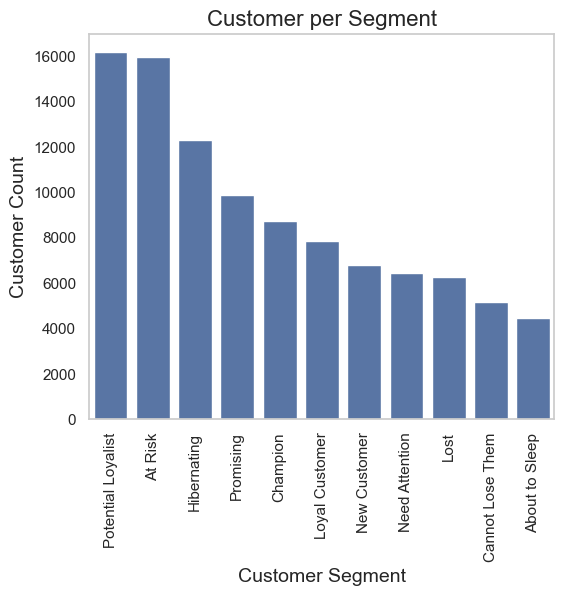

In [124]:
# Bar plot of customer count
ordered_segments = segment_summary.sort_values('customer_count', ascending=False)

# Create the barplot
plt.figure(figsize=(6, 5))
sns.barplot(
    data=segment_summary,
    x='Customer Segment',
    y='customer_count',
    order=ordered_segments['Customer Segment']
)

# Set labels and rotate x-axis ticks
plt.xlabel('Customer Segment', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.title('Customer per Segment', fontsize=16)
plt.xticks(rotation=90)  # Make x-axis ticks vertical

plt.grid(axis='y')
plt.show()

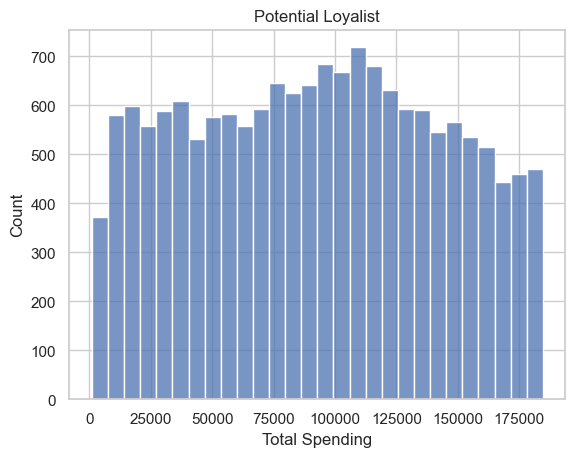

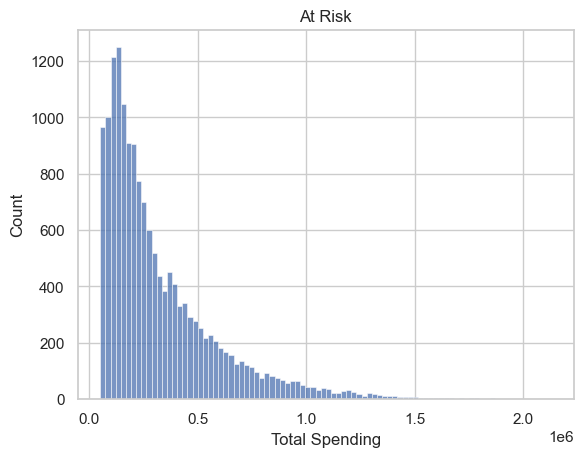

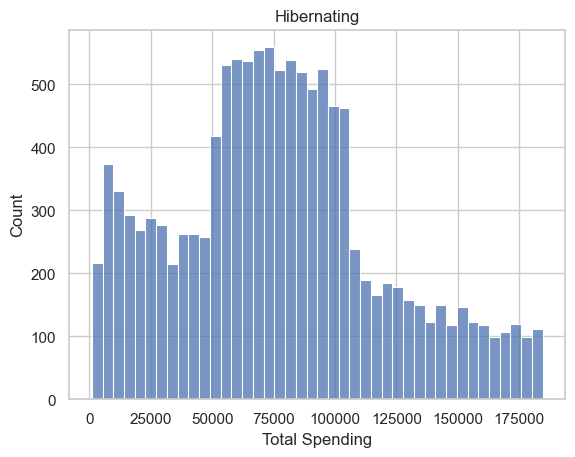

In [204]:
sns.histplot(df[df['Customer Segment']=='Potential Loyalist']['Monetary'])
plt.title('Potential Loyalist')
plt.xlabel('Total Spending')
plt.show()

sns.histplot(df[df['Customer Segment']=='At Risk']['Monetary'])
plt.title('At Risk')
plt.xlabel('Total Spending')
plt.show()

sns.histplot(df[df['Customer Segment']=='Hibernating']['Monetary'])
plt.title('Hibernating')
plt.xlabel('Total Spending')
plt.show()


In [197]:
df['Monetary'].mean()

np.float64(231411.74017778665)

Histogram of Monetary (`total_spent`) of the 3 largest segments shows different patterns of monetary spending between the segments.

- **Potential Loyalist** : Customers in this group exhibit a fairly even distribution of total spending, peaking around 100,000. They have consistent spending habits, indicating strong engagement with your business.
- **At Risk** : Customers in this group have lower total spending, with the majority spending below 500,000. Spending sharply declines as it approaches higher values.
- **Hibernating** : Customers in this group show a spending pattern peaking around 75,000–100,000 but with declining frequency for higher spending. They may have disengaged despite prior moderate spending activity.

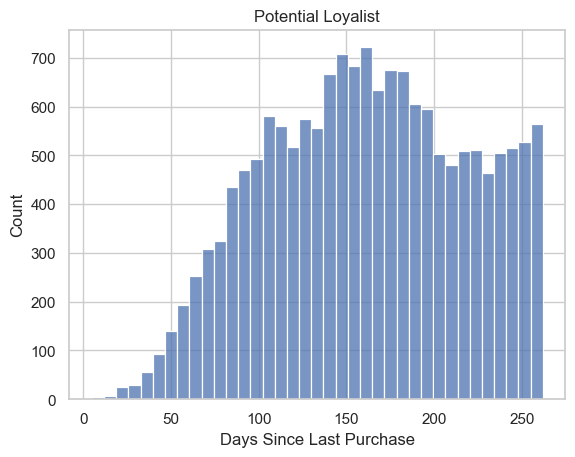

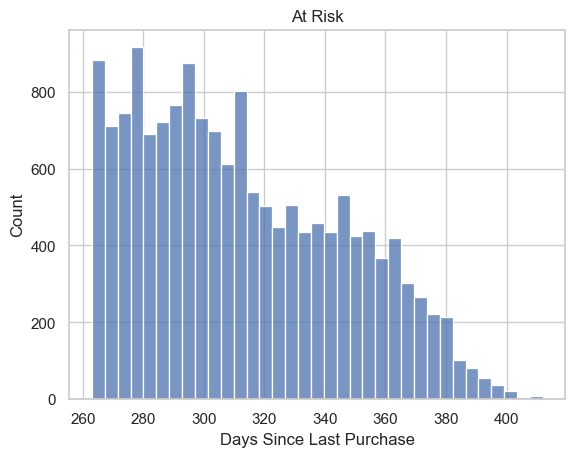

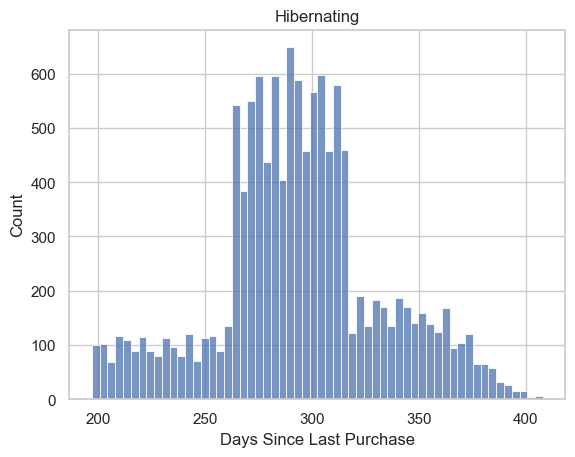

In [206]:
sns.histplot(df[df['Customer Segment']=='Potential Loyalist']['Recency'])
plt.title('Potential Loyalist')
plt.xlabel('Days Since Last Purchase')
plt.show()

sns.histplot(df[df['Customer Segment']=='At Risk']['Recency'])
plt.title('At Risk')
plt.xlabel('Days Since Last Purchase')
plt.show()

sns.histplot(df[df['Customer Segment']=='Hibernating']['Recency'])
plt.title('Hibernating')
plt.xlabel('Days Since Last Purchase')
plt.show()


Histogram of Recency (`last_order`) of the 3 largest segments shows different patterns of last order dates between the segments.

- **Potential Loyalist** : Customers with relatively fewer days since their last purchase, peaking around 150-200 days. This indicates consistent engagement.
- **At Risk** : Customers with longer gaps since their last purchase, starting at around 260 days and peaking near 300.
- **Hibernating** : These customers have the longest inactivity, peaking at around 300 days and tapering off after 350 days. They may have lost interest or shifted to competitors.

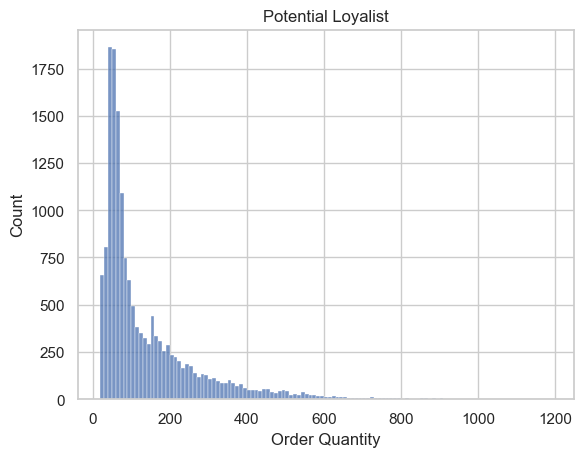

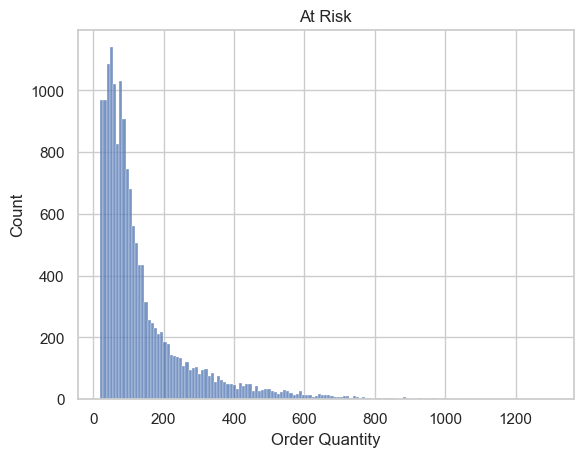

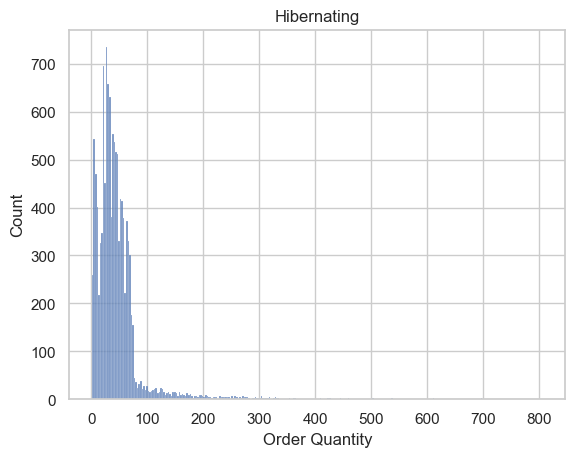

In [212]:
sns.histplot(df[df['Customer Segment']=='Potential Loyalist']['Frequency'])
plt.title('Potential Loyalist')
plt.xlabel('Order Quantity')
plt.show()

sns.histplot(df[df['Customer Segment']=='At Risk']['Frequency'])
plt.title('At Risk')
plt.xlabel('Order Quantity')
plt.show()

sns.histplot(df[df['Customer Segment']=='Hibernating']['Frequency'])
plt.title('Hibernating')
plt.xlabel('Order Quantity')
plt.show()

Histogram of Frequency (`qtt_order`) of the 3 largest segments shows different patterns of total order quantity dates between the segments.

- **Potential Loyalist** and **At Risk**: These two segments have a similar pattern where the smaller order quanitities are more popular.
- **Hibernating** : There is a sharp cut-off in order quanitity between 50-100 orders.

### Insights and Recommendations

Based on the scatterplot, we can group the segments further to make a simpler marketing campaign plan:

1. Potential Loyalist and New Customer
- Characteristics: These segments represent customers with relatively high sales per customer but fewer days since their last purchase. They show strong potential for loyalty or are just starting their journey with the brand.
- Marketing Actions:
    + Welcome Campaigns: For new customers, send personalized welcome messages with discounts on their next purchase.
    + Loyalty Programs: Introduce rewards programs to encourage repeat purchases.
    + Upselling and Cross-Selling: Recommend related or complementary products to maximize sales potential.
    + Engagement Content: Share content highlighting customer success stories or benefits of using the product to strengthen trust.

2. Need Attention, Promising, Loyal Customer, and Champions

- Characteristics: These segments include promising customers on the verge of becoming loyal, as well as currently loyal customers. They might need engagement to sustain their loyalty.
- Marketing Actions: Exclusive Perks for Loyal Customers: Offer early access to sales, exclusive deals, or VIP memberships.
    + Personalized Offers: Use customer data to tailor recommendations and discounts based on purchase history.
    + Reactivation Campaigns: For those in the "Need Attention" group, send reminders about products they previously purchased or limited-time offers.
    + Surprise Gifts: Send thank-you gifts or offers to reinforce loyalty and make them feel valued.

3. Cannot Lose Them and At Risk

- Characteristics: These segments are critical as they represent customers who were once active but are now at risk of leaving. Sales per customer may be declining, or it has been a long time since their last purchase.
- Marketing Actions:
    + Win-Back Campaigns: Send targeted messages highlighting the value of your products, along with strong incentives like discounts or free shipping.
    + Feedback Solicitation: Reach out to understand why engagement has declined. Address their concerns and use the feedback to improve offerings.
    + Special Offers: Create personalized bundles or limited-time promotions to entice them back.
    + Customer Support: Provide proactive assistance, such as reminding them about loyalty rewards or unused benefits.
    
4. Lost, Hibernating, and About to Sleep

- Characteristics: These segments include customers with very low engagement or those who are no longer purchasing. They are the least active but may have potential for reactivation.
- Marketing Actions:
    + Reactivation Emails: Send "We Miss You" emails with compelling discounts or new product announcements.
    + Low-Commitment Offers: Promote low-risk purchases such as free trials, sample packs, or discounts on small items.
    + Content Engagement: Share updates about the brand, such as new product launches or positive customer stories, to regain their interest.
    + Segment Evaluation: If reactivation fails, consider moving these customers out of active marketing campaigns and into a dormant status.
